In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab03B.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #03-B <br></center></h2>

<h1><center>Operations with Numpy arrays<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: 1D heat conduction

Here we will analyze some data that was collected from three temperature sensors placed along the length of a metal rod. The sensors are labeled s0, s1, and s2 in the figure below. A flame is placed under sensor s0, causing it to heat up to about $600^{\circ} C$ (degrees celsius, or centigrade). At the opposite end, a block of ice keeps sensor s2 at around $0^{\circ}C$.

<img src="resources/rod_diagram.png" width="400" />

The plots below shows measurements recorded at several time instances from the three sensors. We can see that s0 and s2 remain approximately fixed at $600^{\circ} C$ and  $0^{\circ} C$, while measurements from s1 gradually rise from $0^{\circ} C$ to about $300^{\circ} C$.

<img src="resources/rod_diff2Dlabeled.png" width="1000" />

Run the next cell to load this data into a NumPy array called $T$. $T$ has one column for each sensor, and one row for each instant of time.

In [3]:
T = np.loadtxt('1drod.csv', delimiter=',')
T

array([[ 6.05182256e+02,  0.00000000e+00, -1.51688438e+01],
       [ 5.75987850e+02,  1.77004024e+02,  2.96259030e+00],
       [ 5.93331090e+02,  2.44486742e+02, -7.22200797e-01],
       [ 5.81951420e+02,  2.75577364e+02, -2.21828337e+00],
       [ 6.13826968e+02,  2.84150887e+02,  1.93498946e+01],
       [ 5.88320599e+02,  3.03613413e+02, -9.26461886e+00],
       [ 6.12067992e+02,  2.95162160e+02,  8.16990304e+00],
       [ 5.92970863e+02,  3.04136232e+02, -2.64343250e+00],
       [ 5.97990797e+02,  2.98752722e+02, -3.18181056e+00],
       [ 5.92578695e+02,  2.97943785e+02,  8.65216517e+00],
       [ 5.96057133e+02,  2.99546772e+02,  1.21217625e+00],
       [ 6.00985552e+02,  2.98999501e+02, -3.67715382e+00],
       [ 6.05969936e+02,  2.98792320e+02, -2.16497321e+01],
       [ 5.84333421e+02,  2.94812989e+02, -9.09523678e+00],
       [ 5.95204889e+02,  2.90496651e+02, -4.85187858e-01],
       [ 5.93807790e+02,  2.94614571e+02,  1.40274423e+00],
       [ 6.33262652e+02,  2.96408989e+02

## Question 1.1 -- Number of time instants

How many time instants were recorded? Save this value to the variable `N`. 


**Note**. Don't simply count the rows by hand. Use the [`shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html) method of the NumPy array. 


In [4]:
(T.shape)[0]

23

In [5]:
N = T.shape[0]

In [6]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2 -- Temperature in degrees fahrenheit

Convert the temperature measurements to degrees Fahrenheit. Recall that the formula for the conversion is:

$$ T_f = \left(9/5\right) T + 32 $$

where $T$ is a temperature value in celsius, and $T_f$ is the corresponding value in fahrenheit. Store the resulting $N\times 3$ array as `Tf`.

In [7]:
Tf = (9/5)*T+32

In [8]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3 -- Average over time

What is the average of the temperature readings for each of the three sensors? Store this as `Tmean0`. It should be an array with 3 entries (one per sensor). 

In [9]:
Tmean0 = T.mean(axis=0)
Tmean0

array([594.69874893, 276.56549501,   0.99028175])

In [10]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4 -- Spatial average

The spatial average temperature is the mean of the three sensor readings at a particular time. Compute this value for each time instant and store it as `Tmean1`. This should be an array with `N` entries (one per time instant). 

In [11]:
Tmean1 = T.mean(axis=1)
Tmean1

array([196.67113731, 251.98482132, 279.03187705, 285.10350018,
       305.7759163 , 294.22313131, 305.13335141, 298.15455411,
       297.85390267, 299.72488152, 298.93869354, 298.76929984,
       294.37084115, 290.01705784, 295.07211743, 296.60836842,
       310.71694508, 307.16234779, 291.2295271 , 297.65106639,
       302.72541297, 297.16119778, 293.20474843])

In [12]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5 -- Standard deviations

Sensors s0 and s2 are supposedly kept at constant temperatures, but we can see from the figure that there is some fluctuation or *noise* in the measurements. We can quantify this noise in the signal by computing its standard deviation. The standard deviation $\sigma$ of an array $A=[a_1,...,a_N]$ is defined as:

$$ \sigma = \sqrt{ \frac{1}{N-1} \sum_{i=1}^{N} (a_i-\bar{a})^2 } $$

Here $\bar{a}$ is the mean of the elements in $A$, and $N$ is the number of elements in $A$.

Compute the standard deviations for each of the sensors, and store the result as `Tstd`. 

**Notes**:
+ The shape of `Tstd` should be `(3,)`.
+ Try to do this in "the NumPy way", using broadcasting and methods such as [np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) instead of loops. 
+ *This formula can be implemented in one line of code*.
+ **Don't use [np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html)**

In [13]:
Tstd = np.sqrt((np.sum((T-Tmean0)**2,axis=0))/(N - 1))
Tstd

array([16.05165584, 66.35218933,  9.36874417])

In [14]:
grader.check("q1p5")

q1p5 results: All test cases passed!

# Question 2: Bouncing ball

There are physical systems, such as the vibrating rod of lab 3A, whose evolution through time is simple enough that it can be expressed with a single formula. Other more complicated dynamics are more difficult to write down. A ball moving in a vacuum that is subject to gravity follows a trajectory that is easily described as a parabola. However, if we introduce the element of a "floor", and a model for "bouncing" and "rolling", then the picture becomes more complicated. It is no longer possible to compute the trajectory of the ball with a single line of code. We must use a `for` loop.

Here we will use a standard coding pattern for computing the trajectory of a dynamical system through time. This evolution is shown in the figure below. The ball follows a sequence of parabolic arcs, separated by bounces (red dots) where some of its energy is lost. Eventually the ball loosing most of its energy and starts rolling (green line).

<img src="resources/ball_pxpy.png" width="800" />


## Question 2.1 -- Time instants

Create an array of time instants with a time step `dt` of 0.015 seconds. The values should range from 0 to 2 seconds.  Call this array `time`. Also find the number of elements in `time` and call it `K`.

**Notes**: 
+ Use [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).
+ `time` will not include a 2, since 2 is not a multiple of `dt`. Rather, the last value in `t` should be 1.995.

In [15]:
dt = 0.015
time = np.arange(0,2,dt)
K = time.shape[0]

In [16]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2 -- Memory allocation


The position and speed of the ball at any given time step `k` is described with four numbers:

+ `px[k]` ... the horizontal component of its position (in meters)
+ `py[k]` ... the vertical component of its position (in meters)
+ `vx[k]` ... the horizontal component of its speed (in meters per second)
+ `vy[k]` ... the vertical component of its speed (in meters per second)

Additionally, at any given moment the ball can be in one of two states: *in flight* or *rolling*. This is captured with a boolean variable `rolling[k]`, which is `True` if the ball is rolling, and `False` otherwise. 

We will also want to track the bounces of the ball. To do this we will use a boolean array called `bounced` that is of the same length as `time` and is `True` when a bounce occurs, and `False` elsewhere. 

Next we will allocate memory for these six arrays: `px`, `py`, `vx`, `vy`, `rolling`, and `bounced`. 

**Notes**. 
+ Useful methods for this include [np.empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html ) and [np.full](https://numpy.org/doc/stable/reference/generated/numpy.full.html).
+ Make sure that your arrays are of the correct data type. The position and velocity arrays contain floats, while `rolling` and `bounced` arrays contain booleans. You can check this with e.g. `np.ndarray.dtype`.


In [17]:
A=np.empty(K,dtype=bool)
A.dtype

dtype('bool')

In [18]:
px = np.empty(K)
py = np.empty(K)
vx = np.empty(K)
vy = np.empty(K)
rolling = np.empty(K,dtype=bool)
bounced = np.empty(K,dtype=bool)

In [19]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3 -- State initialization

The ball begins its flight (time instant `k=0`) at a horizontal position of 0 and a vertical position of 2 meters. Its initial horizontal speed is 1 m/s and its vertical speed is 3 m/s. Initially it is neither bouncing nor rolling. Record this initial state information into the six state arrays.

In [20]:
px[0]=0
py[0]=2
vx[0]=1
vy[0]=3
rolling[0]=False
bounced[0]=False

In [21]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4 -- Loop through time

We can now launch the for loop that will compute the trajectory of the ball through time. In the `k`'th iteration, the task is to compute values to write into the `k`'th position of our six arrays, based on the values in the `k-1`'th array positions. Next we'll outline this calculation in four steps:

1. **rolling update**. The ball is considered to be rolling at time `k` if its position at `k-1` was within one centimeter of the floor *and* its vertical speed at `k-1` was less than 0.01 m/s (in absolute value). 

2. **velocity update**. The horizontal speed of the ball remains constant for all time. The ball's change in vertical speed depends on whether it is rolling or in flight. If it is rolling, then its vertical speed is zero. Otherwise (when it is in flight), its vertical speed is decreased by `dt*g` with respect to the previous time instant; i.e. `vy[k] = vy[k-1] - dt*g`. Here `g` is gravitational acceleration (9.81 m/s).

3. **position update**. We assume that `vx[k-1]` and `vy[k-1]` are the *average* velocity of the ball over the time interval from `time[k-1]` to `time[k]`. If so, then the ball will have advanced by `dt*vx[k-1]` in that interval, and hence `px[k] = px[k-1]+dt*vx[k-1]`. The same is true of the vertical position when the ball is in flight. When it is rolling, the vertical position is set to zero: `py[k]=0`.

4. **bounce detection**. A bounce occurs whenever all three of the following conditions are met:
    1. The vertical velocity is less-or-equal than zero,
    2. The vertical position is less-or-equal than zero,
    3. The ball is not rolling.

If a bounce is detected at time `k`, then the vertical velocity is flipped from negative to positive, and multiplied by an energy-dissipating factor of 0.3: `vy[k] = abs(0.3*vy[k])`; the vertical position is set to 0.

`bounced[k]` is `True` if a bounced ocurred at time `k`.


In [22]:
for k in range(1,K):

    # 1. rolling update
    if py[k-1] < 0.01 and np.abs(vy[k-1]) < 0.01:
        rolling[k]=True
    else: 
        rolling[k]=False
    # 2. velocity update
    vx[k] = 1
    if rolling[k]==True:
        vy[k] = 0
    else:
        vy[k] = vy[k-1]-(dt*9.81)
   # 3. position update
    px[k] = px[k-1] + dt*vx[k-1]
    if rolling[k]==True:
        py[k] =0
    else:
        py[k] = py[k-1]+dt*vy[k-1]
    # 4. bounce detection 
    if vy[k]<=0 and py[k]<=0 and rolling[k]==False:
        bounced[k]= True
    else: 
        bounced[k]= False
    if bounced[k]==True:
        vy[k]=abs(0.3*vy[k])
        py[k]=0

Use this cell to plot your result. Your plot should look identical to the one in the problem description

Text(0, 0.5, 'py')

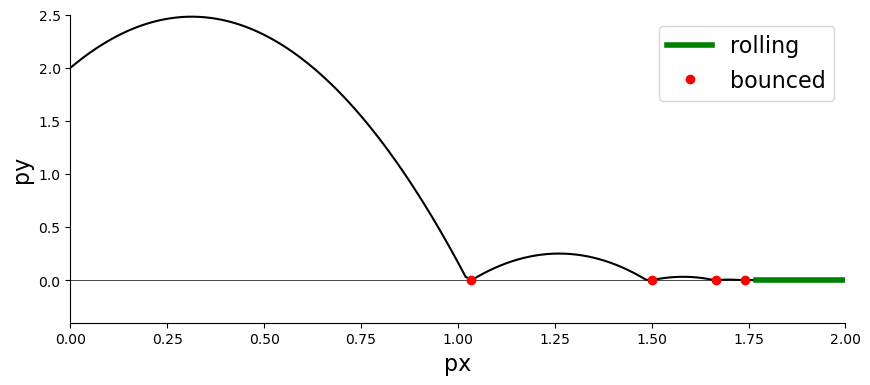

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
plt.axhline(0,c='k',linewidth=0.5)
plt.plot(px, py, 'k-')
plt.plot(px[rolling], py[rolling], 'g',linewidth=4,label='rolling')
plt.plot(px[bounced], py[bounced], 'ro',label='bounced')
ax.spines[['top','right']].set_visible(False)
plt.ylim(-.4,2.5)
plt.xlim(0,2)
plt.legend(fontsize=16)
plt.xlabel('px',fontsize=16)
plt.ylabel('py',fontsize=16)

In [24]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [26]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)